# Multiple Linear Regression - Fish Dataset

Regression model to estimate the weight of fish.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/home/student/Downloads/Fish.xls')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int64

In [9]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [28]:
x=df.iloc[:,[0,2,3,4,5,6]]
x

,Species,Length1,Length2,Length3,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,5,11.5,12.2,13.4,2.0904,1.3936
155,5,11.7,12.4,13.5,2.4300,1.2690
156,5,12.1,13.0,13.8,2.2770,1.2558
157,5,13.2,14.3,15.2,2.8728,2.0672


In [29]:
y=df.iloc[:,1]
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [30]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

<AxesSubplot: xlabel='Length1', ylabel='Weight'>

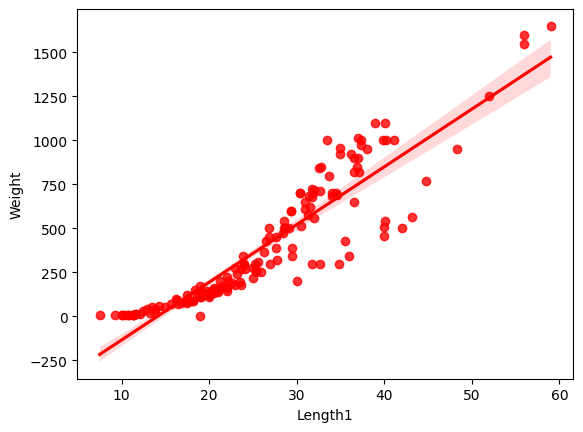

In [31]:
#length1 vs Weight
import seaborn as sns
sns.regplot(x=df['Length1'],y=y,color='red')

<AxesSubplot: xlabel='Length2', ylabel='Weight'>

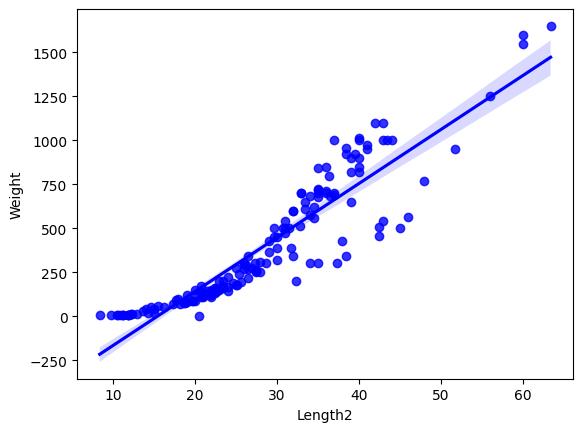

In [32]:
#Length2 vs weight
sns.regplot(x=df['Length2'],y=y,color='blue')

<AxesSubplot: xlabel='Length2', ylabel='Weight'>

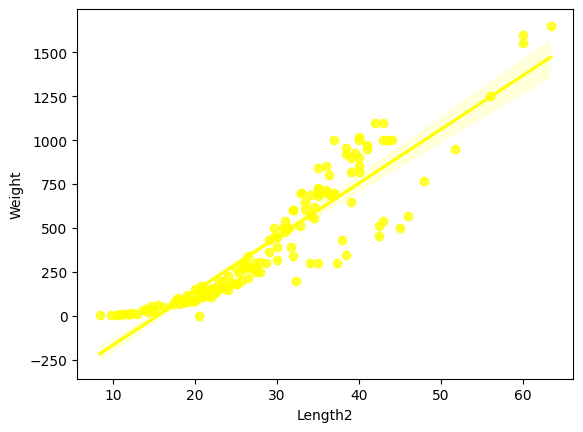

In [33]:
#length2  vs Weight
import seaborn as sns
sns.regplot(x=df['Length2'],y=y,color='yellow')

<AxesSubplot: xlabel='Length3', ylabel='Weight'>

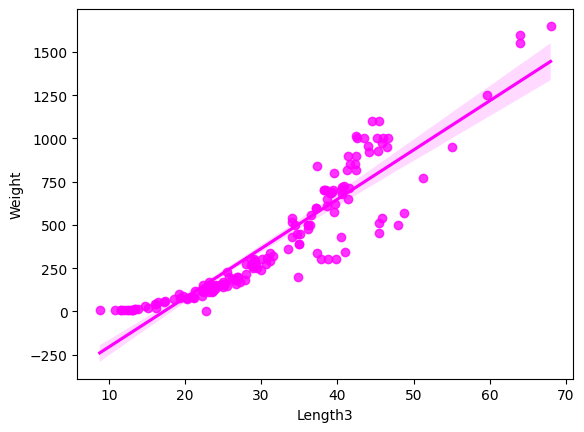

In [34]:
#length3 vs Weight
import seaborn as sns
sns.regplot(x=df['Length3'],y=y,color='magenta')

<AxesSubplot: xlabel='Height', ylabel='Weight'>

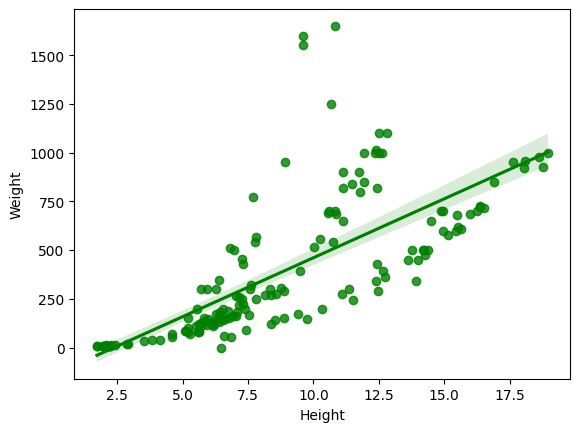

In [35]:
#Height vs Weight
import seaborn as sns
sns.regplot(x=df['Height'],y=y,color='green')

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([  80.07724579, -125.24034251,  407.23604383,  420.33255446,
        154.68134237,  829.25717194, -198.26492201,  287.5025114 ,
        250.72762277, 1176.70354731,  571.36443787,  905.39744941,
        572.74603295,  156.24791255,  675.61098944,  834.95692976,
        929.49559457,  323.3418704 ,  267.27518106,  574.30192897,
       -161.18417123,  631.29748079,  515.74663658,  477.48037973,
        841.85476574,  918.13597589,  211.23465445,  419.36020027,
       -218.51658913, -159.91045716,  702.49880414,    1.18396951,
        -25.38552507,  849.28110085,  333.79737285,  166.96467553,
        209.7207579 ,  139.30403066,  224.56658686,  813.92815385,
        670.0265609 ,  773.66639766, -195.74466733,  136.14226269,
        156.1481081 ,   63.3247492 ,  120.76060153,  649.33488743])

In [38]:
df1=pd.DataFrame({'Actual values':y_test,'Predicted values':y_pred})
df1

,Actual values,Predicted values
78,78.0,80.077246
155,13.4,-125.240343
128,200.0,407.236044
55,270.0,420.332554
94,150.0,154.681342
29,1000.0,829.257172
147,7.0,-198.264922
51,180.0,287.502511
98,188.0,250.727623
141,1250.0,1176.703547


In [42]:
print(model.predict([[5,12.1,13.0,13.8,2.2770,1.2558]]))

[-99.90948409]


/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
#intercept
print(model.intercept_)
#slope
print(list(zip(x,model.coef_)))

-644.0098718243842
[('Species', 28.64637546295401), ('Length1', -4.4420694915973336), ('Length2', 79.47092099551114), ('Length3', -47.811462064787364), ('Height', 41.6603390993916), ('Width', -10.803342336590186)]


In [44]:
#Performance Evaluation
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
error=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print('mean absolute error:',error)
print('mean absolute percentage error:',mape)
print('mean squared error:',mse)
print('root mean squared error:',rmse)
print('r2 score:',score)

mean absolute error: 90.35687780468004
mean absolute percentage error: 3.0415324664011454
mean squared error: 14037.32626892931
root mean squared error: 118.4792229419543
r2 score: 0.8854038212498818
